# Tensors: The Core of PyTorch

You've seen that the journey of building a neural network begins with data. Before you can design a model or start the training process, you must gather your information and prepare it in a format the model can understand. In PyTorch, that fundamental format is the **tensor**. Tensors are more than just data containers; they are optimized for the mathematical operations that power deep learning.



## Why Tensors Matter

In the last lab, you trained a model to predict delivery times. And along the way, you've been using tensors, maybe without thinking too much about them. And that's fine until it isn't. **Many PyTorch errors come from tensor issues.** So let's build up your tensor skills now before those errors might derail your projects.



## Common Tensor Errors

Mastering tensors is a vital step. Many of the most common errors encountered when building models are related to:

* **Tensor shapes**: Shape mismatches are one of the most common PyTorch errors. When you hit a shape mismatch, PyTorch will tell you what's wrong, but not how to fix it. Once you see both shapes, usually the fix will be obvious.

* **Data types (dtype)**: Providing data of the wrong type, such as an integer when your model expects floats, can lead to runtime errors or unexpected behavior during training.

* **Dimensions**: One of the most common shape errors is forgetting the batch dimension. Models expect input with a batch dimension, like `[6, 1]` where the first number tells the model how many samples it's getting.



## What You'll Learn

In this lab, you will learn how to:

* **Create tensors** from different data sources like Python lists, NumPy arrays, and pandas DataFrames.

* **Check tensor shapes** - the most important tool in your tensor toolkit. Understanding shapes tells you exactly how your data is organized.

* **Handle data types** - ensuring your tensors have the correct type (typically float32 for neural networks).

* **Reshape and manipulate tensor dimensions** to prepare data for model inputs, including adding and removing batch dimensions.

* **Use indexing and slicing techniques** to access and filter specific parts of your data.

* **Perform mathematical and logical operations** that form the basis of all neural network computations, including element-wise operations and broadcasting.

By the end of this notebook, you will have the practical skills needed to confidently manage the data for any PyTorch project and debug the most common tensor-related errors.

## Imports

In [ ]:
import torch
import numpy as np
import pandas as pd
from IPython.display import Image

## 1 - Tensor Creation

The first step in any machine learning pipeline is getting your data ready for the model. In PyTorch, this means loading your data into tensors. You will find that there are several convenient ways to create tensors, whether your data is already in another format or you need to generate it from scratch.

### 1.1 From Existing Data Structures

Often, your raw data will be in a common format like a Python list, a NumPy array, or a pandas DataFrame. PyTorch provides straightforward functions to convert these structures into tensors, making the data preparation stage more efficient.

* `torch.tensor()`: This function takes input such as a Python list to convert it into a tensor.

**Note:** The type of numbers you use matters. If you use integers, PyTorch stores them as integers. If you include decimals, they'll be stored as floating point values.

In [3]:
# From Python lists
x = torch.tensor([1, 2, 3])

print("FROM PYTHON LISTS:", x)
print("TENSOR DATA TYPE:", x.dtype)

FROM PYTHON LISTS: tensor([1, 2, 3])
TENSOR DATA TYPE: torch.int64


<br>

* `torch.from_numpy()`: Converts a NumPy array into a PyTorch tensor.
    * If you're coming from NumPy, PyTorch tensors behave almost exactly the same way.
    * **Important**: This shares memory. If you change one, then the other changes too. Be careful when modifying tensors created this way!

In [4]:
# From a NumPy array
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
torch_tensor_from_numpy = torch.from_numpy(numpy_array)

print("TENSOR FROM NUMPY:\n\n", torch_tensor_from_numpy)

TENSOR FROM NUMPY:

 tensor([[1, 2, 3],
        [4, 5, 6]])


<br>

* **From a pandas DataFrame**: Pandas is a Python library for working with data organized in rows and columns, like a CSV file or spreadsheet. A DataFrame is pandas' main data structure for storing this kind of tabular data. DataFrames are one of the most common ways to load and explore datasets in machine learning, especially when reading CSV files. There isn't a direct function to convert a DataFrame to a tensor. The standard method is to extract the data from the DataFrame into a NumPy array using the `.values` attribute, and then convert that array into a tensor using `torch.tensor()`.

In [5]:
# From Pandas DataFrame
# Read the data from the CSV file into a DataFrame
df = pd.read_csv('./data.csv')

# Extract the data as a NumPy array from the DataFrame
all_values = df.values

# Convert the DataFrame's values to a PyTorch tensor
tensor_from_df = torch.tensor(all_values)

print("ORIGINAL DATAFRAME:\n\n", df)
print("\nRESULTING TENSOR:\n\n", tensor_from_df)
print("\nTENSOR DATA TYPE:", tensor_from_df.dtype)

ORIGINAL DATAFRAME:

    distance_miles  delivery_time_minutes
0            1.60                   7.22
1           13.09                  32.41
2            6.97                  17.47

RESULTING TENSOR:

 tensor([[ 1.6000,  7.2200],
        [13.0900, 32.4100],
        [ 6.9700, 17.4700]], dtype=torch.float64)

TENSOR DATA TYPE: torch.float64


### 1.2 - With Predefined Values

Sometimes you need to create tensors for specific purposes, like initializing a model's weights and biases before training begins. PyTorch allows you to quickly generate tensors filled with placeholder values like zeros, ones, or random numbers, which is useful for testing and setup.

* `torch.zeros()`: Creates a tensor filled with zeros of the specified dimensions.

In [6]:
# All zeros
zeros = torch.zeros(2, 3)

print("TENSOR WITH ZEROS:\n\n", zeros)

TENSOR WITH ZEROS:

 tensor([[0., 0., 0.],
        [0., 0., 0.]])


<br>

* `torch.ones()`: Creates a tensor filled with ones of the specified dimensions.

In [7]:
# All ones
ones = torch.ones(2, 3)

print("TENSOR WITH ONES:\n\n", ones)

TENSOR WITH ONES:

 tensor([[1., 1., 1.],
        [1., 1., 1.]])


<br>

* `torch.rand()`: Generates a tensor with random numbers uniformly distributed between 0 and 1, based on the specified dimensions.

In [8]:
# Random numbers
random = torch.rand(2, 3)

print("RANDOM TENSOR:\n\n", random)

RANDOM TENSOR:

 tensor([[0.3148, 0.7634, 0.2841],
        [0.5377, 0.0764, 0.6343]])


### 1.3 - From a Sequence

For situations where you need to generate a sequence of data points, such as a range of values for testing a model's predictions, you can create a tensor directly from that sequence.

* `torch.arange()`: Creates a 1D tensor containing a range of numbers from the specified start value to one less than the specified stop value, incrementing (if positive) or decrementing (if negative) by the specified `step` value.

In [9]:
# Range of numbers
range_tensor = torch.arange(0, 10, step=1)

print("ARANGE TENSOR:", range_tensor)

ARANGE TENSOR: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


## 2 - Reshaping & Manipulating

A very common source of errors in PyTorch projects is a mismatch between the shape of your input data and the shape your model expects. For instance, a model is typically designed to process a batch of data, so even if you want to make a single prediction, you must shape your input tensor to look like a batch of one. Mastering tensor reshaping is a key step toward building and debugging models effectively.

### 2.1 - Checking a Tensor's Dimensions

The first step to fixing a shape mismatch is to understand the current dimensions of your tensor. **Checking the shape is your primary debugging tool.** It tells you how many samples you have and how many features are in each sample.

**Understanding Tensor Shapes**

When you print `tensor.shape`, you'll get something like `torch.Size([6, 1])`. This tells you exactly how your data is organized:
- The first dimension (`6`) is the **batch size** - how many samples you have
- The second dimension (`1`) is the **number of features** per sample

Think of it a little bit like a stack of papers. The model reads each page the same way, whether there are six pages or 600 in the stack. **The first dimension is how many, and the rest describe what each sample looks like.**

For example, with a shape of `[6, 1]`:
- There are 6 samples (deliveries)
- Each sample has 1 feature (distance)

If you had multiple features like distance, hour, and weather, the shape might be `[6, 3]`:
- There are 6 samples
- Each sample has 3 features

**Why Shape Matters**

Shape mismatches are one of the most common PyTorch errors. When you hit a shape mismatch, PyTorch will tell you what's wrong, but not how to fix it. Once you see both shapes, usually the fix will be obvious.

For example, if your model expects `[batch_size, 1]` (one feature per sample) but you pass in `[batch_size, 3]` (three features), it will fail. The model was only built for one input feature.

* `torch.Tensor.shape`: An attribute that returns a `torch.Size` object detailing the size of the tensor along each dimension.

In [10]:
# A 2D tensor
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print("ORIGINAL TENSOR:\n\n", x)
print("\nTENSOR SHAPE:", x.shape)

ORIGINAL TENSOR:

 tensor([[1, 2, 3],
        [4, 5, 6]])

TENSOR SHAPE: torch.Size([2, 3])


### 2.2 - Changing a Tensor's Dimensions

Once you identify a shape mismatch, you need to correct it. A frequent task is adding a dimension to a single data sample to create a batch of size one for your model, or removing a dimension after a batch operation is complete.

**The Most Common Shape Error: Forgetting the Batch Dimension**

One of the most common shape errors is forgetting the batch dimension. Remember, PyTorch models expect input with a batch dimension, like `[6, 1]` that we saw earlier. That first number tells the model how many samples it's getting.

Let's say you want to predict the delivery time for a single order, for example, 25 miles. This is a scalar, but your model expects a shape of `[batch_size, features]`, which at a minimum is `[1, 1]`. You need to add that batch dimension!

**Always check the shape before you use `unsqueeze()`.** And if you're going the other way, try just using `squeeze()`. `squeeze()` removes all dimensions of size one, and it's great for cleaning up after batching.

**Always print `tensor.shape` when you're debugging.** These tools are your first defense against shape errors.

* **Adding Dimension:** `torch.Tensor.unsqueeze()` inserts a new dimension at the specified index.
    * *Notice how the shape will change from `[2, 3]` to `[1, 2, 3]` and the tensor gets wrapped in an extra pair of square brackets `[]`*.
    * Use this when you have a single sample and need to add a batch dimension for your model.

In [11]:
print("ORIGINAL TENSOR:\n\n", x)
print("\nTENSOR SHAPE:", x.shape)
print("-"*45)

# Add dimension
expanded = x.unsqueeze(0)  # Add dimension at index 0

print("\nTENSOR WITH ADDED DIMENSION AT INDEX 0:\n\n", expanded)
print("\nTENSOR SHAPE:", expanded.shape)

ORIGINAL TENSOR:

 tensor([[1, 2, 3],
        [4, 5, 6]])

TENSOR SHAPE: torch.Size([2, 3])
---------------------------------------------

TENSOR WITH ADDED DIMENSION AT INDEX 0:

 tensor([[[1, 2, 3],
         [4, 5, 6]]])

TENSOR SHAPE: torch.Size([1, 2, 3])


<br>

* **Removing Dimension:** `torch.Tensor.squeeze()` removes dimensions of size 1.
    * *This reverses the unsqueeze operation, removing the `1` from the shape and taking away a pair of outer square brackets*.

In [12]:
print("EXPANDED TENSOR:\n\n", expanded)
print("\nTENSOR SHAPE:", expanded.shape)
print("-"*45)

# Remove dimension
squeezed = expanded.squeeze()

print("\nTENSOR WITH DIMENSION REMOVED:\n\n", squeezed)
print("\nTENSOR SHAPE:", squeezed.shape)

EXPANDED TENSOR:

 tensor([[[1, 2, 3],
         [4, 5, 6]]])

TENSOR SHAPE: torch.Size([1, 2, 3])
---------------------------------------------

TENSOR WITH DIMENSION REMOVED:

 tensor([[1, 2, 3],
        [4, 5, 6]])

TENSOR SHAPE: torch.Size([2, 3])


### 2.3 - Restructuring

Beyond just adding or removing dimensions, you may need to completely change a tensor's structure to match the requirements of a specific layer or operation within your neural network.

* **Reshaping:** `torch.Tensor.reshape()` changes the shape of a tensor to the specified dimensions.

In [13]:
print("ORIGINAL TENSOR:\n\n", x)
print("\nTENSOR SHAPE:", x.shape)
print("-"*45)

# Reshape
reshaped = x.reshape(3, 2)

print("\nAFTER PERFORMING reshape(3, 2):\n\n", reshaped)
print("\nTENSOR SHAPE:", reshaped.shape)

ORIGINAL TENSOR:

 tensor([[1, 2, 3],
        [4, 5, 6]])

TENSOR SHAPE: torch.Size([2, 3])
---------------------------------------------

AFTER PERFORMING reshape(3, 2):

 tensor([[1, 2],
        [3, 4],
        [5, 6]])

TENSOR SHAPE: torch.Size([3, 2])


* **Transposing:** `torch.Tensor.transpose()` swaps the specified dimensions of a tensor.

In [14]:
print("ORIGINAL TENSOR:\n\n", x)
print("\nTENSOR SHAPE:", x.shape)
print("-"*45)

# Transpose
transposed = x.transpose(0, 1)

print("\nAFTER PERFORMING transpose(0, 1):\n\n", transposed)
print("\nTENSOR SHAPE:", transposed.shape)

ORIGINAL TENSOR:

 tensor([[1, 2, 3],
        [4, 5, 6]])

TENSOR SHAPE: torch.Size([2, 3])
---------------------------------------------

AFTER PERFORMING transpose(0, 1):

 tensor([[1, 4],
        [2, 5],
        [3, 6]])

TENSOR SHAPE: torch.Size([3, 2])


In [15]:
assert x.transpose(0, 1).shape == x.transpose(1, 0).shape

### 2.4 - Combining Tensors

In the data preparation stage, you might need to combine data from different sources or merge separate batches into one larger dataset.

* `torch.cat()`: Joins a sequence of tensors along an existing dimension. Note: All tensors must have the same shape in dimensions other than the one being concatenated.

In [16]:
# Create two tensors to concatenate
tensor_a = torch.tensor([[1, 2],
                         [3, 4]])
tensor_b = torch.tensor([[5, 6],
                         [7, 8]])

# Concatenate along columns (dim=1)
concatenated_tensors = torch.cat((tensor_a, tensor_b), dim=1)


print("TENSOR A:\n\n", tensor_a)
print("\nTENSOR B:\n\n", tensor_b)
print("-"*45)
print("\nCONCATENATED TENSOR (dim=1):\n\n", concatenated_tensors)

TENSOR A:

 tensor([[1, 2],
        [3, 4]])

TENSOR B:

 tensor([[5, 6],
        [7, 8]])
---------------------------------------------

CONCATENATED TENSOR (dim=1):

 tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


## 3 - Indexing & Slicing

After you have your data in a tensor, you will often need to access specific parts of it. Whether you are grabbing a single prediction to inspect its value, separating your input features from your labels, or selecting a subset of data for analysis, indexing and slicing are the tools for the job.

### 3.1 - Accessing Elements

These are the fundamental techniques for getting data out of a tensor, working very similarly to how you would access elements in a standard Python list.

* **Standard Indexing**: Accessing single elements or entire rows using integer indices (e.g., `x[0]`, `x[1, 2]`).

In [17]:
# Create a 3x4 tensor
x = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
print("ORIGINAL TENSOR:\n\n", x)
print("-" * 55)

# Get a single element at row 1, column 2
single_element_tensor = x[1, 2]

print("\nINDEXING SINGLE ELEMENT AT [1, 2]:", single_element_tensor)
print("-" * 55)

# Get the entire second row (index 1)
second_row = x[1]

print("\nINDEXING ENTIRE ROW [1]:", second_row)
print("-" * 55)

# Last row
last_row = x[-1]

print("\nINDEXING ENTIRE LAST ROW ([-1]):", last_row, "\n")

ORIGINAL TENSOR:

 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
-------------------------------------------------------

INDEXING SINGLE ELEMENT AT [1, 2]: tensor(7)
-------------------------------------------------------

INDEXING ENTIRE ROW [1]: tensor([5, 6, 7, 8])
-------------------------------------------------------

INDEXING ENTIRE LAST ROW ([-1]): tensor([ 9, 10, 11, 12]) 



<br>

* **Slicing**: Extracting sub-tensors using `[start:end:step]` notation (e.g., `x[:2, ::2]`).
    * *Note: The `end` index itself is not included in the slice.*
* Slicing can be used to access entire columns.

In [18]:
print("ORIGINAL TENSOR:\n\n", x)
print("-" * 55)

# Get the first two rows
first_two_rows = x[0:2]

print("\nSLICING FIRST TWO ROWS ([0:2]):\n\n", first_two_rows)
print("-" * 55)

# Get the third column of all rows
third_column = x[:, 2]

print("\nSLICING THIRD COLUMN ([:, 2]]):", third_column)
print("-" * 55)

# Every other column
every_other_col = x[:, ::2]

print("\nEVERY OTHER COLUMN ([:, ::2]):\n\n", every_other_col)
print("-" * 55)

# Last column
last_col = x[:, -1]

print("\nLAST COLUMN ([:, -1]):", last_col, "\n")

ORIGINAL TENSOR:

 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
-------------------------------------------------------

SLICING FIRST TWO ROWS ([0:2]):

 tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
-------------------------------------------------------

SLICING THIRD COLUMN ([:, 2]]): tensor([ 3,  7, 11])
-------------------------------------------------------

EVERY OTHER COLUMN ([:, ::2]):

 tensor([[ 1,  3],
        [ 5,  7],
        [ 9, 11]])
-------------------------------------------------------

LAST COLUMN ([:, -1]): tensor([ 4,  8, 12]) 



* Combining Indexing & Slicing

In [19]:
print("ORIGINAL TENSOR:\n\n", x)
print("-" * 55)

# Combining slicing and indexing (First two rows, last two columns)
combined = x[0:2, 2:]

print("\nFIRST TWO ROWS, LAST TWO COLS ([0:2, 2:]):\n\n", combined, "\n")

ORIGINAL TENSOR:

 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
-------------------------------------------------------

FIRST TWO ROWS, LAST TWO COLS ([0:2, 2:]):

 tensor([[3, 4],
        [7, 8]]) 



<br>

* **`.item()`**: Extracts the value from a single-element tensor as a standard Python number.
    * Even a single index value is still a tensor. So if you want the actual Python value (like a float or int), use `.item()` to convert it into a Python number.
    * **Be careful**: `.item()` only works on tensors with exactly one element. Call it on a bigger tensor, and you'll get an error.
    * This is especially useful when you want to check predictions or use tensor values in Python conditionals or print statements.

In [20]:
print("SINGLE-ELEMENT TENSOR:", single_element_tensor)
print("-" * 45)

# Extract the value from a single-element tensor as a standard Python number
value = single_element_tensor.item()

print("\n.item() PYTHON NUMBER EXTRACTED:", value)
print("TYPE:", type(value))

SINGLE-ELEMENT TENSOR: tensor(7)
---------------------------------------------

.item() PYTHON NUMBER EXTRACTED: 7
TYPE: <class 'int'>


### 3.2 - Advanced Indexing

For more complex data selection, such as filtering your dataset based on one or more conditions, you can use advanced indexing techniques.

* **Boolean Masking**: Using a boolean tensor to select elements that meet a certain condition (e.g., `x[x > 5]`).

In [21]:
print("ORIGINAL TENSOR:\n\n", x)
print("-" * 55)

# Boolean indexing using logical comparisons
mask = x > 6

print("MASK (VALUES > 6):\n\n", mask, "\n")

# Applying Boolean masking
mask_applied = x[mask]

print("VALUES AFTER APPLYING MASK:", mask_applied, "\n")

ORIGINAL TENSOR:

 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
-------------------------------------------------------
MASK (VALUES > 6):

 tensor([[False, False, False, False],
        [False, False,  True,  True],
        [ True,  True,  True,  True]]) 

VALUES AFTER APPLYING MASK: tensor([ 7,  8,  9, 10, 11, 12]) 



<br>

* **Fancy Indexing**: Using a tensor of indices to select specific elements in a non-contiguous way.

In [22]:
print("ORIGINAL TENSOR:\n\n", x)
print("-" * 55)

# Fancy indexing

# Get first and third rows
row_indices = torch.tensor([0, 2])

# Get second and fourth columns
col_indices = torch.tensor([1, 3]) 

# Gets values at (0,1), (0,3), (2,1), (2,3)
get_values = x[row_indices[:, None], col_indices]

print("\nSPECIFIC ELEMENTS USING INDICES:\n\n", get_values, "\n")

ORIGINAL TENSOR:

 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
-------------------------------------------------------

SPECIFIC ELEMENTS USING INDICES:

 tensor([[ 2,  4],
        [10, 12]]) 



## 4 - Mathematical & Logical Operations

At their core, neural networks are performing mathematical computations. A single neuron, for example, calculates a weighted sum of its inputs and adds a bias. PyTorch is optimized to perform these operations efficiently across entire tensors at once, which is what makes training so fast.

**How PyTorch Computes with Tensors**

Let's start with a computation from your single neuron model: `weight × distance + bias`. Here's what that looks like when you have multiple distances to process. PyTorch's tensor math works **element-wise**, so each element is operated on independently. Your computation applies the same weight to each distance, and then adds the same bias to each result. The math looks just like regular Python, but PyTorch runs these operations efficiently on all elements at once.

This works for scalars (single values) as well as tensors that have the same shape. But what if you have more complex data? That's where **broadcasting** comes in.

### 4.1 - Arithmetic

These operations are the foundation of how a neural network processes data. You'll see how PyTorch handles element-wise calculations and uses a powerful feature called broadcasting to simplify your code.

* **Element-wise Operations**: Standard math operators (`+`, `*`) that apply to each element independently.
    * When tensors have the same shape, operations work element by element.
    * Each element in the first tensor is paired with the corresponding element in the second tensor.

In [23]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
print("TENSOR A:", a)
print("TENSOR B", b)
print("-" * 60)

# Element-wise addition
element_add = a + b

print("\nAFTER PERFORMING ELEMENT-WISE ADDITION:", element_add, "\n")

TENSOR A: tensor([1, 2, 3])
TENSOR B tensor([4, 5, 6])
------------------------------------------------------------

AFTER PERFORMING ELEMENT-WISE ADDITION: tensor([5, 7, 9]) 



In [24]:
print("TENSOR A:", a)
print("TENSOR B", b)
print("-" * 65)

# Element-wise multiplication
element_mul = a * b

print("\nAFTER PERFORMING ELEMENT-WISE MULTIPLICATION:", element_mul, "\n")

TENSOR A: tensor([1, 2, 3])
TENSOR B tensor([4, 5, 6])
-----------------------------------------------------------------

AFTER PERFORMING ELEMENT-WISE MULTIPLICATION: tensor([ 4, 10, 18]) 



<br>

* **Dot Product (`torch.matmul()`)**: Calculates the dot product of two vectors or matrices.

In [25]:
print("TENSOR A:", a)
print("TENSOR B", b)
print("-" * 65)

# Dot product
dot_product = torch.matmul(a, b)

print("\nAFTER PERFORMING DOT PRODUCT:", dot_product, "\n")

TENSOR A: tensor([1, 2, 3])
TENSOR B tensor([4, 5, 6])
-----------------------------------------------------------------

AFTER PERFORMING DOT PRODUCT: tensor(32) 



<br>

* **Broadcasting**: The automatic expansion of smaller tensors to match the shape of larger tensors during arithmetic operations.
    * Broadcasting allows operations between tensors with compatible shapes, even if they don't have the exact same dimensions.
    
**Understanding Broadcasting**

You know that tensors with the same shape will work element by element, but remember how a scalar could update every value in a tensor? When you add a scalar to a tensor, PyTorch automatically expands that single value to match every element. And that's how weight and bias could apply to all of your distances at once. **This automatic expansion is broadcasting in action.**

- The NumPy docs for Broadcasting, as it is the same for PyTorch: https://numpy.org/doc/stable/user/basics.broadcasting.html
- The PyTorch docs for Broadcasting: https://docs.pytorch.org/docs/stable/notes/broadcasting.html

**How Broadcasting Works**

Normally, PyTorch requires exact dimension matches for operations. Different shapes would cause an error. But here's the magic: **When one dimension is 1 and the other is larger, PyTorch will automatically expand the smaller dimension by repeating values.**

For example:
- A tensor with shape `[1, 1]` can broadcast with a tensor of shape `[1, 3]`
- The `[1, 1]` tensor becomes `[1, 3]` by repeating the single value
- Now they can be added together

**More Complex Broadcasting**

What happens when you combine a `[1, 3]` tensor with a `[3, 1]` tensor? PyTorch looks at each dimension:
- The first dimension: `1` versus `3`. The `1` expands to `3`.
- The second dimension: `3` versus `1`. The `1` expands to `3`.
- So both become `[3, 3]`.

**Why Broadcasting Matters**

This pattern appears everywhere in deep learning:
- Adjusting multiple features across batches
- Combining different dimensions of data
- Applying transformations efficiently

Instead of manually repeating values or using loops, you can just write the operation. No loops. No manual repetition. PyTorch handles it all through broadcasting. Once you know to look for it, you're going to see broadcasting opportunities everywhere in deep learning.

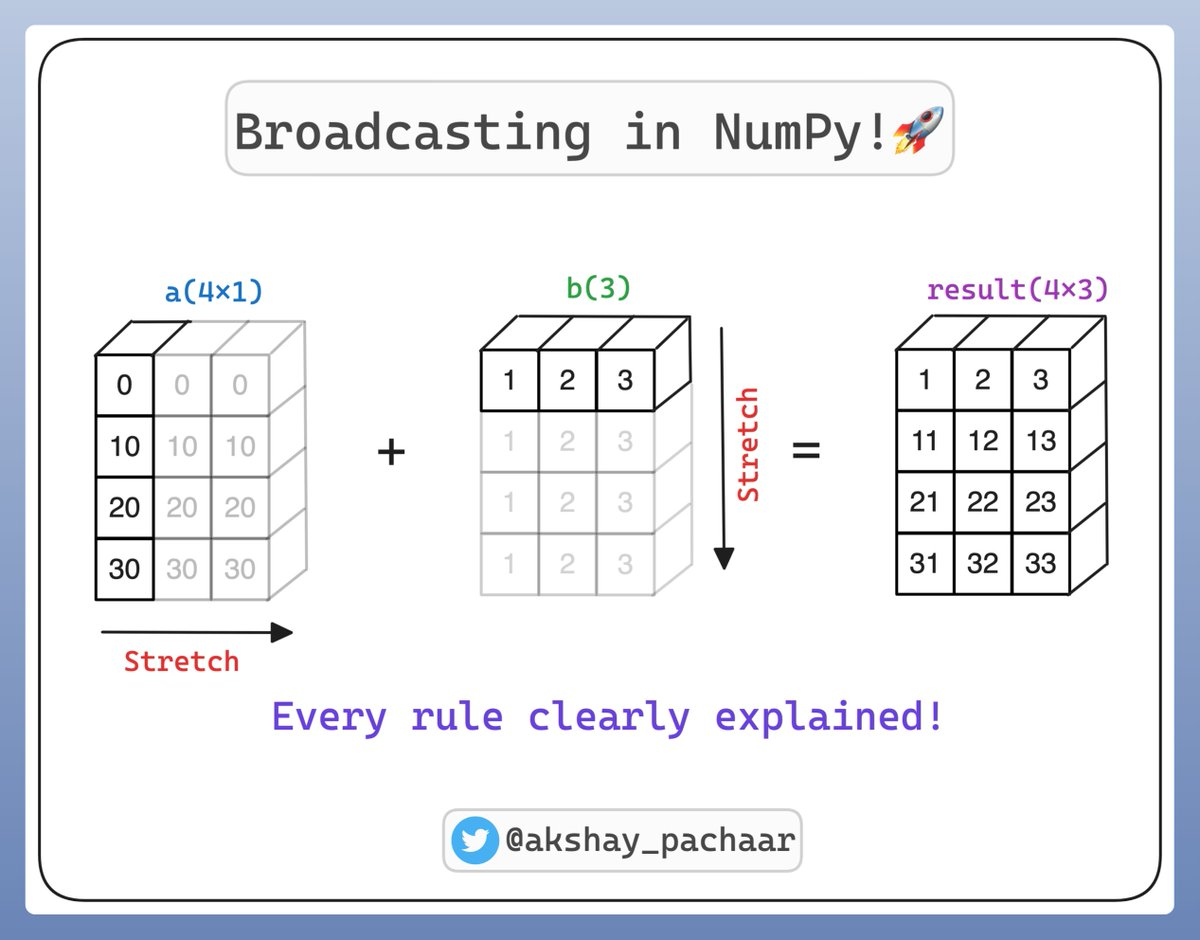

In [4]:
Image('../../assets/broadcasting_akshay_pachaar.png')

Checkout these two sources:


In [26]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([[1],
                 [2],
                 [3]])

print("TENSOR A:", a)
print("SHAPE:", a.shape)
print("\nTENSOR B\n\n", b)
print("\nSHAPE:", b.shape)
print("-" * 65)

# Apply broadcasting
c = a + b


print("\nTENSOR C:\n\n", c)
print("\nSHAPE:", c.shape, "\n")

TENSOR A: tensor([1, 2, 3])
SHAPE: torch.Size([3])

TENSOR B

 tensor([[1],
        [2],
        [3]])

SHAPE: torch.Size([3, 1])
-----------------------------------------------------------------

TENSOR C:

 tensor([[2, 3, 4],
        [3, 4, 5],
        [4, 5, 6]])

SHAPE: torch.Size([3, 3]) 



### 4.2 - Logic & Comparisons

Logical operations are powerful tools for data preparation and analysis. They allow you to create boolean masks to filter, select, or modify your data based on specific conditions you define.

* **Comparison Operators**: Element-wise comparisons (`>`, `==`, `<`) that produce a boolean tensor.

In [27]:
temperatures = torch.tensor([20, 35, 19, 35, 42])
print("TEMPERATURES:", temperatures)
print("-" * 50)

### Comparison Operators (>, <, ==)

# Use '>' (greater than) to find temperatures above 30
is_hot = temperatures > 30

# Use '<=' (less than or equal to) to find temperatures 20 or below
is_cool = temperatures <= 20

# Use '==' (equal to) to find temperatures exactly equal to 35
is_35_degrees = temperatures == 35

print("\nHOT (> 30 DEGREES):", is_hot)
print("COOL (<= 20 DEGREES):", is_cool)
print("EXACTLY 35 DEGREES:", is_35_degrees, "\n")

TEMPERATURES: tensor([20, 35, 19, 35, 42])
--------------------------------------------------

HOT (> 30 DEGREES): tensor([False,  True, False,  True,  True])
COOL (<= 20 DEGREES): tensor([ True, False,  True, False, False])
EXACTLY 35 DEGREES: tensor([False,  True, False,  True, False]) 



<br>

* **Logical Operators**: Element-wise logical operations (`&` for **AND**, `|` for **OR**) on boolean tensors.

In [28]:
is_morning = torch.tensor([True, False, False, True])
is_raining = torch.tensor([False, False, True, True])
print("IS MORNING:", is_morning)
print("IS RAINING:", is_raining)
print("-" * 50)

### Logical Operators (&, |)

# Use '&' (AND) to find when it's both morning and raining
morning_and_raining = (is_morning & is_raining)

# Use '|' (OR) to find when it's either morning or raining
morning_or_raining = is_morning | is_raining

print("\nMORNING & (AND) RAINING:", morning_and_raining)
print("MORNING | (OR) RAINING:", morning_or_raining)

IS MORNING: tensor([ True, False, False,  True])
IS RAINING: tensor([False, False,  True,  True])
--------------------------------------------------

MORNING & (AND) RAINING: tensor([False, False, False,  True])
MORNING | (OR) RAINING: tensor([ True, False,  True,  True])


### 4.3 - Statistics

Calculating statistics like the mean or standard deviation can be useful for understanding your dataset or for implementing certain types of normalization during the data preparation phase.

* `torch.mean()`: Calculates the mean of all elements in a tensor.

In [29]:
data = torch.tensor([10.0, 20.0, 30.0, 40.0, 50.0])
print("DATA:", data)
print("-" * 45)

# Calculate the mean
data_mean = data.mean()

print("\nCALCULATED MEAN:", data_mean, "\n")

DATA: tensor([10., 20., 30., 40., 50.])
---------------------------------------------

CALCULATED MEAN: tensor(30.) 



<br>

* `torch.std()`: Calculates the standard deviation of all elements.

In [30]:
print("DATA:", data)
print("-" * 45)

# Calculate the standard deviation
data_std = data.std()

print("\nCALCULATED STD:", data_std, "\n")

DATA: tensor([10., 20., 30., 40., 50.])
---------------------------------------------

CALCULATED STD: tensor(15.8114) 



### 4.4 - Data Types

Just as important as a tensor's shape is its data type. Neural networks typically perform their calculations using 32-bit floating point numbers (float32). Providing data of the wrong type, such as an integer, can lead to runtime errors or unexpected behavior during training. It is a good practice to ensure your tensors have the correct data type for your model.

**Understanding Data Types in PyTorch**

When you create a tensor, PyTorch can use defaults:
- If you enter integers, you'll get `int64`
- If you include a decimal point, then you'll get `float32`
- If you want to be explicit, you can use the `dtype` argument. It guarantees `float32` even if you forget the decimal point
- Alternatively, you can use `.float()` to convert any tensor to `float32`

**Type Promotion**

What happens if you mix types? It used to be the case that PyTorch would throw an error when you try to mix dtypes. That's no longer true. Now PyTorch will automatically handle mixed types through **type promotion**. For example, if you add an int tensor and a float tensor, PyTorch will automatically convert the int to float and then return a float result, just like regular Python.

**Choosing the Right Type**

There are other types too, like `float64` for extra precision or `int8` for memory savings. But for neural networks, **`float32` is the sweet spot**. It's fast, accurate, and standard on modern hardware.

* **Type Casting (`.int()`, `.float()`, etc.)**: Converts a tensor from one data type to another (e.g., from float to integer).

In [31]:
print("DATA:", data)
print("DATA TYPE:", data.dtype)
print("-" * 45)

# Cast the tensor to a int type
int_tensor = data.int()

print("\nCASTED DATA:", int_tensor)
print("CASTED DATA TYPE", int_tensor.dtype)

DATA: tensor([10., 20., 30., 40., 50.])
DATA TYPE: torch.float32
---------------------------------------------

CASTED DATA: tensor([10, 20, 30, 40, 50], dtype=torch.int32)
CASTED DATA TYPE torch.int32


## 5 - Optional Exercises

You've now covered the essential tools for working with tensors in PyTorch. Theory provides the map, but hands-on practice is what builds true confidence and skill. The following optional exercises are your opportunity to apply what you have learned to practical scenarios, from analyzing sales data to engineering new features for a machine learning model. This is where the concepts truly come to life, so dive in and put your new knowledge to the test!

### Exercise 1: Analyzing Monthly Sales Data

You're a data analyst at an e-commerce company. You've been given a tensor representing the monthly sales of three different products over a period of four months. Your task is to extract meaningful insights from this data.

The tensor `sales_data` is structured as follows:

* **Rows** represent the **products** (Product A, Product B, Product C).

* **Columns** represent the **months** (Jan, Feb, Mar, Apr).

**Your goals are**:

1. Calculate the total sales for **Product B** (the second row).
2. Identify which months had sales **greater than 130** for **Product C** (the third row) using boolean masking.
3. Extract the sales data for all products for the months of **Feb and Mar** (the middle two columns).

<br>

<details>
<summary><span style="color:green;"><strong>Solution (Click here to expand)</strong></span></summary>

```python
### START CODE HERE ###

# 1. Calculate total sales for Product B.
total_sales_product_b = sales_data[1].sum()

# 2. Find months where sales for Product C were > 130.
high_sales_mask_product_c = sales_data[2] > 130

# 3. Get sales for Feb and Mar for all products.
sales_feb_mar = sales_data[:, 1:3]

### END CODE HERE ###
```

In [32]:
# Sales data for 3 products over 4 months
sales_data = torch.tensor([[100, 120, 130, 110],   # Product A
                           [ 90,  95, 105, 125],   # Product B
                           [140, 115, 120, 150]    # Product C
                          ], dtype=torch.float32)

print("ORIGINAL SALES DATA:\n\n", sales_data)
print("-" * 45)

### START CODE HERE ###

# 1. Calculate total sales for Product B.
total_sales_product_b = __BLANK__

# 2. Find months where sales for Product C were > 130.
high_sales_mask_product_c = __BLANK__

# 3. Get sales for Feb and Mar for all products.
sales_feb_mar = __BLANK__

### END CODE HERE ###

print("\nTotal Sales for Product B:                   ", total_sales_product_b)
print("\nMonths with >130 Sales for Product C (Mask): ", high_sales_mask_product_c)
print("\nSales for Feb & Mar:\n\n", sales_feb_mar)

ORIGINAL SALES DATA:

 tensor([[100., 120., 130., 110.],
        [ 90.,  95., 105., 125.],
        [140., 115., 120., 150.]])
---------------------------------------------

Total Sales for Product B:                    tensor(415.)

Months with >130 Sales for Product C (Mask):  tensor([ True, False, False,  True])

Sales for Feb & Mar:

 tensor([[120., 130.],
        [ 95., 105.],
        [115., 120.]])


#### Expected Output:

```
Total Sales for Product B:			 tensor(415.)

Months with >130 Sales for Product C (Mask):	 tensor([ True, False, False,  True])

Sales for Feb & Mar:

 tensor([[120., 130.],
        [ 95., 105.],
        [115., 120.]])
```

### Exercise 2: Image Batch Transformation

You're working on a computer vision model and have a batch of 4 grayscale images, each of size 3x3 pixels. The data is currently in a tensor with the shape `[4, 3, 3]`, which represents `[batch_size, height, width]`.

For processing with certain deep learning frameworks, you need to transform this data into the `[batch_size, channels, height, width]` format. Since the images are grayscale, **you'll need to**:

1. Add a new dimension of size 1 at index 1 to represent the color channel.
2. After adding the channel, you realize the model expects the shape `[batch_size, height, width, channels]`. Transpose the tensor to swap the channel dimension with the last dimension.

<br>

<details>
<summary><span style="color:green;"><strong>Solution (Click here to expand)</strong></span></summary>

```python
### START CODE HERE ###

# 1. Add a channel dimension at index 1.
image_batch_with_channel = image_batch.unsqueeze(1)

# 2. Transpose the tensor to move the channel dimension to the end.
# Swap dimension 1 (channels) with dimension 3 (the last one).
image_batch_transposed = image_batch_with_channel.transpose(1, 3)

### END CODE HERE ###
```

In [33]:
# A batch of 4 grayscale images, each 3x3
image_batch = torch.rand(4, 3, 3)

print("ORIGINAL BATCH SHAPE:", image_batch.shape)
print("-" * 45)

### START CODE HERE ###

# 1. Add a channel dimension at index 1.
image_batch_with_channel = __BLANK__

# 2. Transpose the tensor to move the channel dimension to the end.
# Swap dimension 1 (channels) with dimension 3 (the last one).
image_batch_transposed = __BLANK__

### END CODE HERE ###


print("\nSHAPE AFTER UNSQUEEZE:", image_batch_with_channel.shape)
print("SHAPE AFTER TRANSPOSE:", image_batch_transposed.shape)

ORIGINAL BATCH SHAPE: torch.Size([4, 3, 3])
---------------------------------------------

SHAPE AFTER UNSQUEEZE: torch.Size([4, 1, 3, 3])
SHAPE AFTER TRANSPOSE: torch.Size([4, 3, 3, 1])


#### Expected Output:

```
SHAPE AFTER UNSQUEEZE: torch.Size([4, 1, 3, 3])
SHAPE AFTER TRANSPOSE: torch.Size([4, 3, 3, 1])
```

### Exercise 3: Combining and Weighting Sensor Data

You're building an environment monitoring system that uses two sensors: one for temperature and one for humidity. You receive data from these sensors as two separate 1D tensors.

**Your task is to**:

1. **Concatenate** the two tensors into a single `2x5` tensor, where the first row is temperature data and the second is humidity data.
2. Create a `weights` tensor `torch.tensor([0.6, 0.4])`.
3. Use **broadcasting and element-wise multiplication** to apply these weights to the combined sensor data. The temperature data should be multiplied by 0.6 and the humidity data by 0.4.
4. Finally, calculate the **weighted average** for each time step by **summing** the weighted values along `dim=0` and **dividing** by the sum of the weights.

<br>

<details>
<summary><span style="color:green;"><strong>Solution (Click here to expand)</strong></span></summary>

```python
### START CODE HERE ###

# 1. Concatenate the two tensors.
# Note: You need to unsqueeze them first to stack them vertically.
combined_data = torch.cat((temperature.unsqueeze(0), humidity.unsqueeze(0)), dim=0)

# 2. Create the weights tensor.
weights = torch.tensor([0.6, 0.4])

# 3. Apply weights using broadcasting.
# You need to reshape weights to [2, 1] to broadcast across columns.
weighted_data = combined_data * weights.unsqueeze(1)

# 4. Calculate the weighted average for each time step.
#    (A true average = weighted sum / sum of weights)
weighted_sum = torch.sum(weighted_data, dim=0)
weighted_average = weighted_sum / torch.sum(weights)

### END CODE HERE ###
```

In [34]:
# Sensor readings (5 time steps)
temperature = torch.tensor([22.5, 23.1, 21.9, 22.8, 23.5])
humidity = torch.tensor([55.2, 56.4, 54.8, 57.1, 56.8])

print("TEMPERATURE DATA: ", temperature)
print("HUMIDITY DATA:    ", humidity)
print("-" * 45)

### START CODE HERE ###

# 1. Concatenate the two tensors.
# Note: You need to unsqueeze them first to stack them vertically.
combined_data = __BLANK__

# 2. Create the weights tensor.
weights = __BLANK__

# 3. Apply weights using broadcasting.
# You need to reshape weights to [2, 1] to broadcast across columns.
weighted_data = __BLANK__

# 4. Calculate the weighted average for each time step.
#    (A true average = weighted sum / sum of weights)
weighted_sum = __BLANK__
weighted_average = __BLANK__

### END CODE HERE ###

print("\nCOMBINED DATA (2x5):\n\n", combined_data)
print("\nWEIGHTED DATA:\n\n", weighted_data)
print("\nWEIGHTED AVERAGE:", weighted_average)

TEMPERATURE DATA:  tensor([22.5000, 23.1000, 21.9000, 22.8000, 23.5000])
HUMIDITY DATA:     tensor([55.2000, 56.4000, 54.8000, 57.1000, 56.8000])
---------------------------------------------

COMBINED DATA (2x5):

 tensor([[22.5000, 23.1000, 21.9000, 22.8000, 23.5000],
        [55.2000, 56.4000, 54.8000, 57.1000, 56.8000]])

WEIGHTED DATA:

 tensor([[13.5000, 13.8600, 13.1400, 13.6800, 14.1000],
        [22.0800, 22.5600, 21.9200, 22.8400, 22.7200]])

WEIGHTED AVERAGE: tensor([35.5800, 36.4200, 35.0600, 36.5200, 36.8200])


#### Expected Output:

```
COMBINED DATA (2x5):

 tensor([[22.5000, 23.1000, 21.9000, 22.8000, 23.5000],
        [55.2000, 56.4000, 54.8000, 57.1000, 56.8000]])

WEIGHTED DATA:

 tensor([[13.5000, 13.8600, 13.1400, 13.6800, 14.1000],
        [22.0800, 22.5600, 21.9200, 22.8400, 22.7200]])

WEIGHTED AVERAGE: tensor([35.5800, 36.4200, 35.0600, 36.5200, 36.8200])
```

### Exercise 4: Feature Engineering for Taxi Fares

You are working with a dataset of taxi trips. You have a tensor, `trip_data`, where each row is a trip and the columns represent **[distance (km), hour_of_day (24h)]**.

**Your goal** is to engineer a new binary feature called `is_rush_hour_long_trip`. This feature should be `True` (or `1`) only if a trip meets **both** of the following criteria:

* It's a **long trip** (distance > 10 km).
* It occurs during a **rush hour** (8-10 AM or 5-7 PM, i.e., `[8, 10)` or `[17, 19)`).

To achieve this, you will need to:

1. **Slice** the `trip_data` tensor to isolate the `distance` and `hour` columns.
2. Use **logical and comparison operators** to create boolean masks for each condition (long trip, morning rush, evening rush).
3. Combine these masks to create the final `is_rush_hour_long_trip` feature.
4. **Reshape** this new 1D feature tensor into a 2D column vector and convert its data type to float so it can be combined with the original data.

<br>

<details>
<summary><span style="color:green;"><strong>Solution (Click here to expand)</strong></span></summary>

```python
### START CODE HERE ###

# 1. Slice the main tensor to get 1D tensors for each feature.
distances = trip_data[:, 0]
hours = trip_data[:, 1]

# 2. Create boolean masks for each condition.
is_long_trip = distances > 10.0
is_morning_rush = (hours >= 8.0) & (hours < 10.0)
is_evening_rush = (hours >= 17.0) & (hours < 19.0)

# 3. Combine masks to identify rush hour long trips.
# A trip is a rush hour long trip if it's (a morning OR evening rush) AND a long trip.
is_rush_hour_long_trip_mask = (is_morning_rush | is_evening_rush) & is_long_trip

# 4. Reshape the new feature into a column vector and cast to float.
new_feature_col = is_rush_hour_long_trip_mask.float().unsqueeze(1)

### END CODE HERE ###
```

In [36]:
# Data for 8 taxi trips: [distance, hour_of_day]
trip_data = torch.tensor([
    [5.3, 7],   # Not rush hour, not long
    [12.1, 9],  # Morning rush, long trip -> RUSH HOUR LONG
    [15.5, 13], # Not rush hour, long trip
    [6.7, 18],  # Evening rush, not long
    [2.4, 20],  # Not rush hour, not long
    [11.8, 17], # Evening rush, long trip -> RUSH HOUR LONG
    [9.0, 9],   # Morning rush, not long
    [14.2, 8]   # Morning rush, long trip -> RUSH HOUR LONG
], dtype=torch.float32)

In [42]:
distance = trip_data[:,0]
hour = trip_data[:, 1]
is_long_trip = distance > 10
is_rush_hour = ((8 <= hour) & (hour < 10)) | ((17 <= hour) & (hour < 19))
is_rush_hour_long_trip = is_long_trip & is_rush_hour
is_rush_hour_long_trip

tensor([False,  True, False, False, False,  True, False,  True])

In [46]:
trip_data.shape

torch.Size([8, 2])

In [48]:
reshaped = is_rush_hour_long_trip.unsqueeze(dim=0).transpose(0, 1)
reshaped.shape

torch.Size([8, 1])

In [49]:
torch.concat((trip_data, reshaped), dim=1)

tensor([[ 5.3000,  7.0000,  0.0000],
        [12.1000,  9.0000,  1.0000],
        [15.5000, 13.0000,  0.0000],
        [ 6.7000, 18.0000,  0.0000],
        [ 2.4000, 20.0000,  0.0000],
        [11.8000, 17.0000,  1.0000],
        [ 9.0000,  9.0000,  0.0000],
        [14.2000,  8.0000,  1.0000]])

In [51]:
# Data for 8 taxi trips: [distance, hour_of_day]
trip_data = torch.tensor([
    [5.3, 7],   # Not rush hour, not long
    [12.1, 9],  # Morning rush, long trip -> RUSH HOUR LONG
    [15.5, 13], # Not rush hour, long trip
    [6.7, 18],  # Evening rush, not long
    [2.4, 20],  # Not rush hour, not long
    [11.8, 17], # Evening rush, long trip -> RUSH HOUR LONG
    [9.0, 9],   # Morning rush, not long
    [14.2, 8]   # Morning rush, long trip -> RUSH HOUR LONG
], dtype=torch.float32)


print("ORIGINAL TRIP DATA (Distance, Hour):\n\n", trip_data)
print("-" * 55)


### START CODE HERE ###

# 1. Slice the main tensor to get 1D tensors for each feature.
distances = __BLANK__
hours = __BLANK__

# 2. Create boolean masks for each condition.
is_long_trip = __BLANK__
is_morning_rush = __BLANK__
is_evening_rush = __BLANK__

# 3. Combine masks to identify rush hour long trips.
# A trip is a rush hour long trip if it's (a morning OR evening rush) AND a long trip.
is_rush_hour_long_trip_mask = __BLANK__

# 4. Reshape the new feature into a column vector and cast to float.
new_feature_col = __BLANK__

### END CODE HERE ###

print("\n'IS RUSH HOUR LONG TRIP' MASK: ", is_rush_hour_long_trip_mask)
print("\nNEW FEATURE COLUMN (Reshaped):\n\n", new_feature_col)

# You can now concatenate this new feature to the original data
enhanced_trip_data = torch.cat((trip_data, new_feature_col), dim=1)
print("\nENHANCED DATA (with new feature at the end):\n\n", enhanced_trip_data)

ORIGINAL TRIP DATA (Distance, Hour):

 tensor([[ 5.3000,  7.0000],
        [12.1000,  9.0000],
        [15.5000, 13.0000],
        [ 6.7000, 18.0000],
        [ 2.4000, 20.0000],
        [11.8000, 17.0000],
        [ 9.0000,  9.0000],
        [14.2000,  8.0000]])
-------------------------------------------------------

'IS RUSH HOUR LONG TRIP' MASK:  tensor([False,  True, False, False, False,  True, False,  True])

NEW FEATURE COLUMN (Reshaped):

 tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.]])

ENHANCED DATA (with new feature at the end):

 tensor([[ 5.3000,  7.0000,  0.0000],
        [12.1000,  9.0000,  1.0000],
        [15.5000, 13.0000,  0.0000],
        [ 6.7000, 18.0000,  0.0000],
        [ 2.4000, 20.0000,  0.0000],
        [11.8000, 17.0000,  1.0000],
        [ 9.0000,  9.0000,  0.0000],
        [14.2000,  8.0000,  1.0000]])


#### Expected Output:

```
'IS RUSH HOUR LONG TRIP' MASK:  tensor([False,  True, False, False, False,  True, False,  True])

NEW FEATURE COLUMN (Reshaped):

 tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.]])

ENHANCED DATA (with new feature at the end):

 tensor([[ 5.3000,  7.0000,  0.0000],
        [12.1000,  9.0000,  1.0000],
        [15.5000, 13.0000,  0.0000],
        [ 6.7000, 18.0000,  0.0000],
        [ 2.4000, 20.0000,  0.0000],
        [11.8000, 17.0000,  1.0000],
        [ 9.0000,  9.0000,  0.0000],
        [14.2000,  8.0000,  1.0000]])
```        

## Conclusion

Congratulations on completing this lab! You have now worked through the fundamental building blocks of PyTorch. You started with an empty slate and learned to create, reshape, combine, and query tensors in various ways.

The skills you have developed here are essential for every machine learning practitioner. The element-wise arithmetic and broadcasting you practiced are precisely how a neural network efficiently applies weights and biases to entire batches of data at once. The reshaping techniques like `unsqueeze` and `squeeze` are what allow you to prepare a single data point for a model that expects a batch, and then clean up the output afterward. These are not just abstract exercises; they are the day-to-day operations required to build and debug effective deep learning models.

With this solid understanding of tensors, you are now fully prepared to move on to the next stage: building and training neural networks to solve even more complex problems. Every model you build from now on will stand on this foundation.